# C++的对象特性

# 1. 对象的初始化和清理

① 对象的初始化和清理是两个非常重要的安全问题。

② 一个对象或者变量没有初始状态，对其使用后果是未知。

③ 同样的使用完一个对象或变量，没有及时清理，也会造成一定的安全问题。

④ C++利用了构造函数和析构函数解决上述问题，这两个函数将会被编译器自动调用，完成对象初始化和清理工作。

⑤ 对象的初始化和清理工作是编译器强制要我们做的事情，因此如果我们不提供构造和析构，编译器会提供编译器提供的构造函数和析构函数是空实现。

# 2. 构造函数和析构函数

## 2.1 构造函数和析构函数的作用

① 构造函数：主要作用在于创建对象时为对象的成员属性赋值，构造函数由编译器自动调用，无须手动调用。

② 析构函数：主要作用在于对象销毁前系统自动调用，执行一些清理工作。

## 2.2 构造函数和析构函数的语法

① 构造函数语法：类名 () {}

1. 构造函数，没有返回值也不写void。
2. 函数名称与类名相同。
3. 构造函数可以有参数，因此可以重载。
4. 程序在调用对象时候会自动调用构造，无须手动调用，而且只会调用一次。

② 析构函数语法：~类名(){}

1. 析构函数，，没有返回值也不写void。
2. 函数名称与类名相同，在名称前加上符号。
3. 析构函数不可以有参数，因此不可以发生重载。
4. 程序在对象销毁前会自动调用析构，无须手动调用，而且只会调用一次。

In [ ]:
#include <iostream>
using namespace std;
#include <string>

//对象的初始化和清理
//1、构造函数 进行初始化操作

class Person
{
public:  //无论是构造函数还是析构函数都是在public作用域下
    //1.1、构造函数
    //没有返回值 不用写void
    //函数名 与类名相同
    //构造函数可以有参数，可以发生重载
    //创建对象的时候，构造函数会自动调用，而且只调用一次
    Person()
    {
        cout << "Person 构造函数的调用" << endl;
    }

    /*
    如果你不写，编译器会自动创建一个，但是里面是空语句
    Person()
    {
        
    }
    */

    //1. 析构函数，，没有返回值也不写void。
    //2. 函数名称与类名相同，在名称前加上符号。
    //3. 析构函数不可以有参数，因此不可以发生重载。
    //4. 程序在对象销毁前会自动调用析构，无须手动调用，而且只会调用一次。
    ~Person()
    {
        cout << "Person 析构函数的调用" << endl;
    }
};

//构造和析构都是必须有的实现，如果我们自己不提供，编译器会提供一个空实现
void test01()
{
    Person p;  //创建对象的时候，自动调用构造函数
               //这个对象p是一个局部变量，是在栈上的数据，test01执行完，释放这个对象
}

int main()
{
    
    //方式一：
    test01();   // 析构释放时机在test01运行完前，test01函数运行完后，里面的对象就被释放了
    

    /*
    方式二：     //创建对象的时候，自动调用构造函数
    Person p;   //只有构造函数，没有析构函数，只有main函数结束完前，对象要释放掉了，才会调用析构函数
    */

    system("pause");

    return 0;

}

运行结果：  
 - Person 构造函数的调用  
 - Person 析构函数的调用  
 - 请按任意键继续. . .

## 2.3 构造函数的分类及调用

① 两种分类方式：

1. 按参数分为：有参构造和无参构造。
2. 按类型分为：普通构造和拷贝构造。

② 三种调用方式：

1. 括号法
2. 显示法
3. 隐式转换法

In [ ]:
#include <iostream>
using namespace std;

//1构造函数的分类及调用
//分类
//按照参数分类：无参构造(默认构造) 和 有参构造
class Person
{
public: 
    //构造函数  编译器默认的构造函数是无参的
    Person()
    {
        cout << "Person 无参构造函数的调用" << endl;
    }


    Person(int a)
    {
        age = a;
        cout << "Person 有参构造函数的调用" << endl;
    }

    //拷贝构造函数
    Person( const Person &p)  //用引用的方式传进来，不能改变原来的对象的属性，所以用const        
    {
        // 将传入的人人身上的所有属性，拷贝到我身上
        cout << "Person 拷贝构造函数的调用" << endl;
        age = p.age;
    }

    ~Person()
    {
        cout << "Person 析构函数的调用" << endl;
    }

    int age;
};

//调用
void test01()
{
    /*
    
    //1、括号法
    Person p1;       //默认构造函数调用
    Person p2(10);   //有参构造函数
    Person p3(p2);   //拷贝构造函数

    cout << "p2的年龄为：" << p2.age << endl;
    cout << "p3的年龄为：" << p3.age << endl;

    //注意事项1
    //调用默认构造函数的时候，不要加()。
    //下面这行代码，编译器会认为是一个函数的声明，像void func(),不会认为在创建对象。
    //Person p1();

    */

    /*
    * 
    //2、显示法
    Person p1;  //创建一个对象，这个对象调用的是无参构造
    Person p2 = Person(10); //有参构造  将匿名对象起了一个名称p2
    Person p3 = Person(p2); //创建一个对象，这个对象调用的是拷贝构造

    Person(10); //匿名对象 特点：当前行执行结束后，系统会立即回收匿名对象
    cout << "aaaa" << endl;  //通过打印时机可以得到：test还没结束，就运行析构函数了
    
    //注意事项2
    //不要利用拷贝构造函数 初始化匿名对象  编译器认为 Person(p3) 等价于 Person p3，
    //编译器会认为这是一个对象的声明，而上面已经有一个p3了，Person p3 = Person(p2);因此编译器认为重定义了       
    Person(p3);

    */
    
    //3、隐式转换法
    Person p4 = 10; //相当于 写了 Person p4 = Person(10);  调用有参构造
    Person p5 = p4; //调用拷贝构造

}
int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - Person 有参构造函数的调用  
 - Person 拷贝构造函数的调用  
 - Person 析构函数的调用  
 - Person 析构函数的调用  
 - 请按任意键继续. . .

## 2.4 拷贝构造函数调用时机

① C++中拷贝构造函数调用时机通常有三种情况。

1. 使用一个已经创建完毕的对象来初始化一个新对象。
2. 值传递的方式给函数参数传值。
3. 以值方式返回局部对象。

In [ ]:
#include <iostream>
using namespace std;

//拷贝构造函数调用时机

//1、使用一个已经创建完毕的对象来初始化一个新对象

//2、值传递的方式给函数参数传值

//3、值方式返回局部对象

class Person
{
public:
    Person()
    {
        cout << "Person 默认构造函数调用" << endl;
    }

    Person(int age)
    {
        m_Age = age;
        cout << "Person 有参构造函数调用" << endl;
    }

    Person(const Person& p)
    {
        m_Age = p.m_Age;
        cout << "Person 拷贝构造函数调用" << endl;
    }

    ~Person()
    {
        cout << "Person 析构函数调用" << endl;
    }

    int m_Age;

};

//1、使用一个已经创建完毕的对象来初始化一个新对象
void test01()
{
    Person p1(20);
    Person p2(p1);

    cout << "p2的年龄为：" << p2.m_Age << endl;
}

//2、值传递的方式给函数参数传值
void doWork(Person p)
{

}

void test02()
{
    Person p;
    doWork(p);   //实参传给形参的时候，会调用拷贝构造函数，这个是值传递，是一个临时的副本
                 //拷贝出去的p和原来的p 不是一个p
}

//3、值方式返回局部对象
Person doWork2() //返回值类型为Person对象
{
    Person p1;   //局部对象
    cout << (int*)&p1 << endl;
    return p1;  //以值的方式返回一个拷贝的对象给外部，拷贝出一个对象p1'与原对象p1不一样,调用拷贝构造函数

    //程序运行结束，释放原p1，调用析构函数
}

void test03()
{
    Person p = doWork2(); //这里没有调用拷贝构造函数，直接用p接收拷贝对象p1’
    cout << (int*)&p << endl;

    //程序运行结束，释放拷贝的对象p1',调用析构函数
}

int main()
{
    //test01();	
    //test02();
    test03();

    system("pause");

    return 0;

}

运行结果：  
 - Person 默认构造函数调用  
 - 005DF904  
 - Person 拷贝构造函数调用  
 - Person 析构函数调用  
 - 005DF9FC  
 - Person 析构函数调用   
 - 请按任意键继续. . .

## 2.5 构造函数调用规则

### 2.5.1 构造函数调用规则

① 默认情况下，C++编译器至少给一个类添加3个函数。

1. 默认构造函数(无参，函数体为空)
2. 默认析构函数(无参，函数体为空)
3. 默认拷贝构造函数，对属性进行值拷贝

② 构造函数调用规则如下：

1. 如果用户定义有参构造函数，C++不再提供默认无参构造，但是会提供默认拷贝构造。
2. 如果用户定义拷贝函数，C++不会再提供其他构造函数。

③ 巧记法，如下图所示，如果定义中间的，上面的就默认不定义了，下面的默认定义。

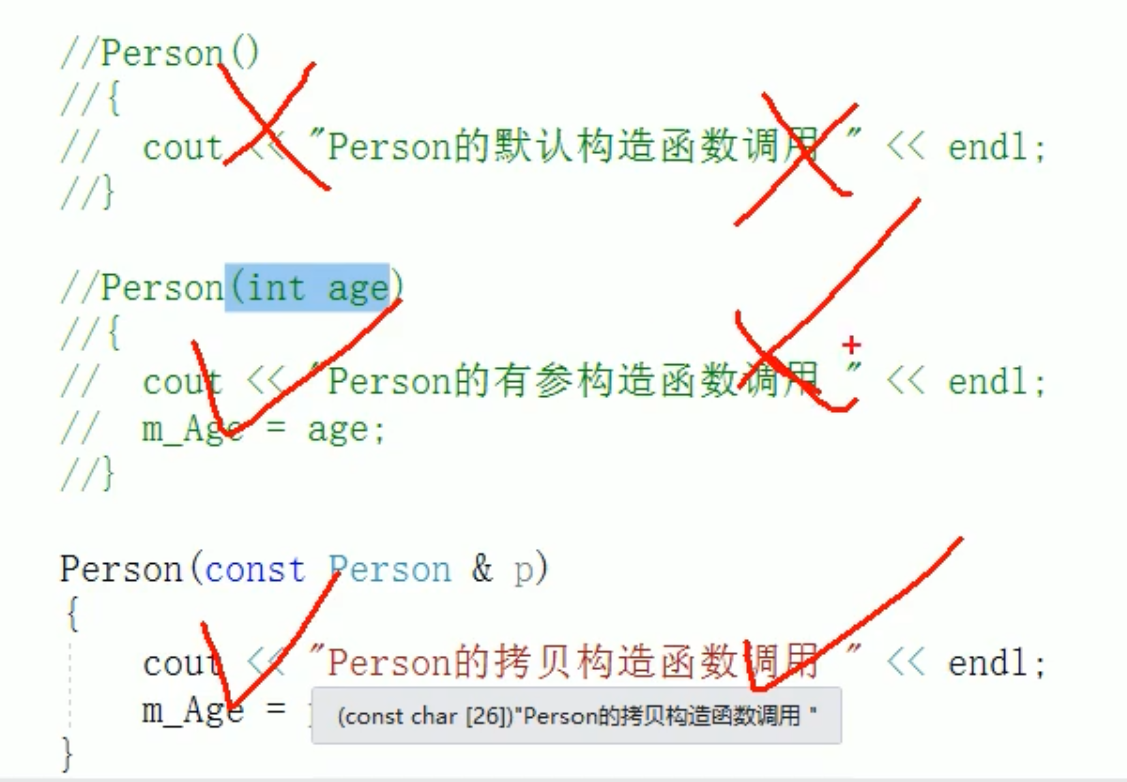

### 2.5.2 调用定义的拷贝构造函数

In [ ]:
#include <iostream>
using namespace std;

//构造函数的调用规则
//1、创建一个类，C+=编译器会给每个类都添加至少3个函数
//默认构造 (空实现)
//析构函数 (空实现)
//拷贝构造 (值拷贝)

class Person
{
public:
    Person()
    {
        cout << "Person 默认构造函数调用" << endl;
    }
    
    Person(int age)
    {
        m_Age = age;
        cout << "Person 有参构造函数调用" << endl;
    }

    Person(const Person & p)
    {
        m_Age = p.m_Age;
        cout << "Person 拷贝构造函数调用" << endl;
    }

    ~Person()
    {
        cout << "Person 析构函数调用" << endl;
    }

    int m_Age;

};

void test01()
{
    Person p;
    p.m_Age = 18;
    
    Person p2(p);

    cout << "p2的年龄：" << p2.m_Age << endl;
}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - Person 默认构造函数调用  
 - Person 拷贝构造函数调用  
 - p2的年龄：18  
 - Person 析构函数调用  
 - Person 析构函数调用  
 - 请按任意键继续. . .

### 2.5.3 调用默认的拷贝构造函数

In [ ]:
#include <iostream>
using namespace std;

//构造函数的调用规则
//1、创建一个类，C+=编译器会给每个类都添加至少3个函数
//默认构造 (空实现)
//析构函数 (空实现)
//拷贝构造 (值拷贝)

class Person
{
public:
    Person()
    {
        cout << "Person 默认构造函数调用" << endl;
    }

    Person(int age)
    {
        m_Age = age;
        cout << "Person 有参构造函数调用" << endl;
    }

    //编译器自动提高拷贝构造函数

    ~Person()
    {
        cout << "Person 析构函数调用" << endl;
    }

    int m_Age;

};

void test01()
{
    Person p;
    p.m_Age = 18;

    Person p2(p);  //调用编译器默认的拷贝构造函数会把p的所有属性拷贝过来

    cout << "p2的年龄：" << p2.m_Age << endl;
}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - Person 默认构造函数调用  
 - p2的年龄：18  
 - Person 析构函数调用  
 - Person 析构函数调用  
 - 请按任意键继续. . .

### 2.5.4 调用定义的有参构造函数

In [ ]:
#include <iostream>
using namespace std;

//构造函数的调用规则
//1、创建一个类，C+=编译器会给每个类都添加至少3个函数
//默认构造 (空实现)
//析构函数 (空实现)
//拷贝构造 (值拷贝)

class Person
{
public:

    Person(int age)
    {
        m_Age = age;
        cout << "Person 有参构造函数调用" << endl;
    }

    //编译器自动提高拷贝构造函数

    ~Person()
    {
        cout << "Person 析构函数调用" << endl;
    }

    int m_Age;

};


void test02()
{
    Person p; //如果写了有参构造函数，编译器就不再提供默认构造，依然提供拷贝构造构造
              //由于没有默认构造函数，所以报错

    Person p2(p);
}

int main()
{
    test02();

    system("pause");

    return 0;

}

### 2.5.5 调用定义的拷贝构造函数

In [ ]:
#include <iostream>
using namespace std;

//构造函数的调用规则
//1、创建一个类，C+=编译器会给每个类都添加至少3个函数
//默认构造 (空实现)
//析构函数 (空实现)
//拷贝构造 (值拷贝)

class Person
{
public:
    //如果写了拷贝构造函数，编译器就不再提供其他普通构造函数
    Person(const Person& p)
    {
        m_Age = p.m_Age;
        cout << "Person 拷贝构造函数调用" << endl;
    }

    ~Person()
    {
        cout << "Person 析构函数调用" << endl;
    }

    int m_Age;

};

void test01()
{
    Person p;    //没有默认构造函数，报错
    Person(10);  //没有有参构造函数，报错

    Person p2(p);

    cout << "p2的年龄：" << p2.m_Age << endl;
}

int main()
{
    test01();

    system("pause");

    return 0;

}

# 3. 深拷贝与浅拷贝

① 浅拷贝：简单的赋值拷贝操作。

② 深拷贝：在堆区重新申请空间，进行拷贝操作。

③ 浅拷贝，如下图所示，带来的问题就是堆区的内存重复释放。

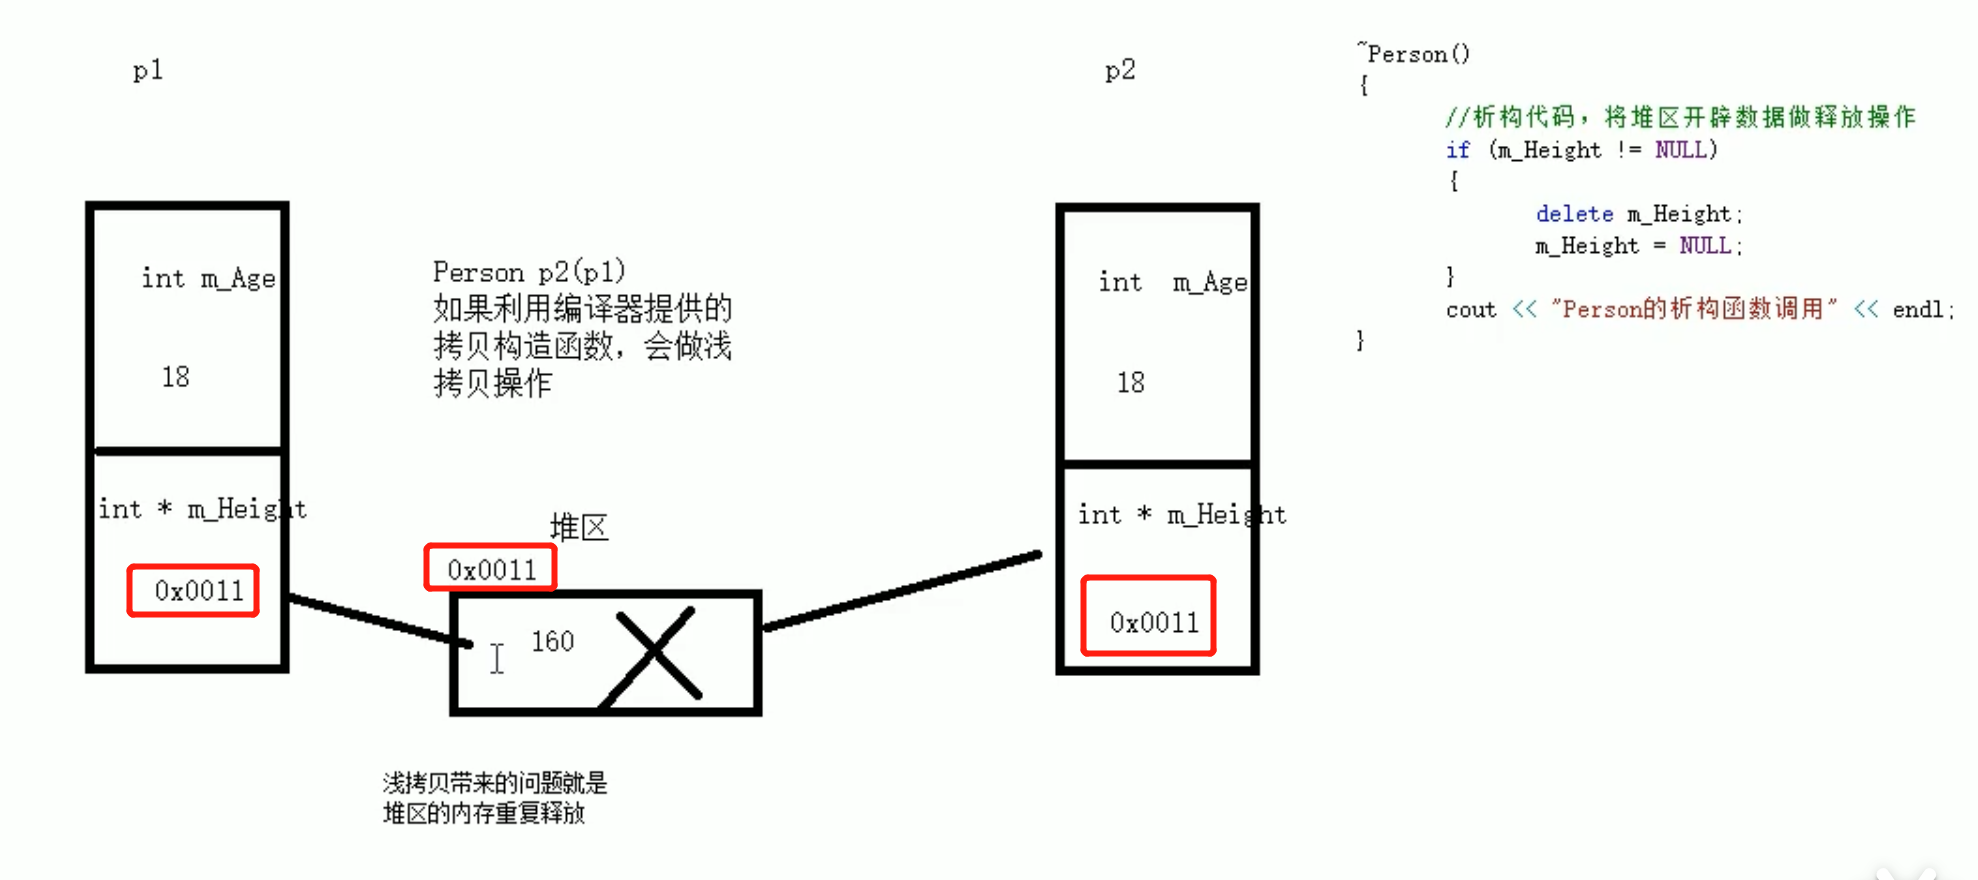

④ 深拷贝，如下图所示，在堆区自己创建一份内存，可以避免堆区的内存重复释放。

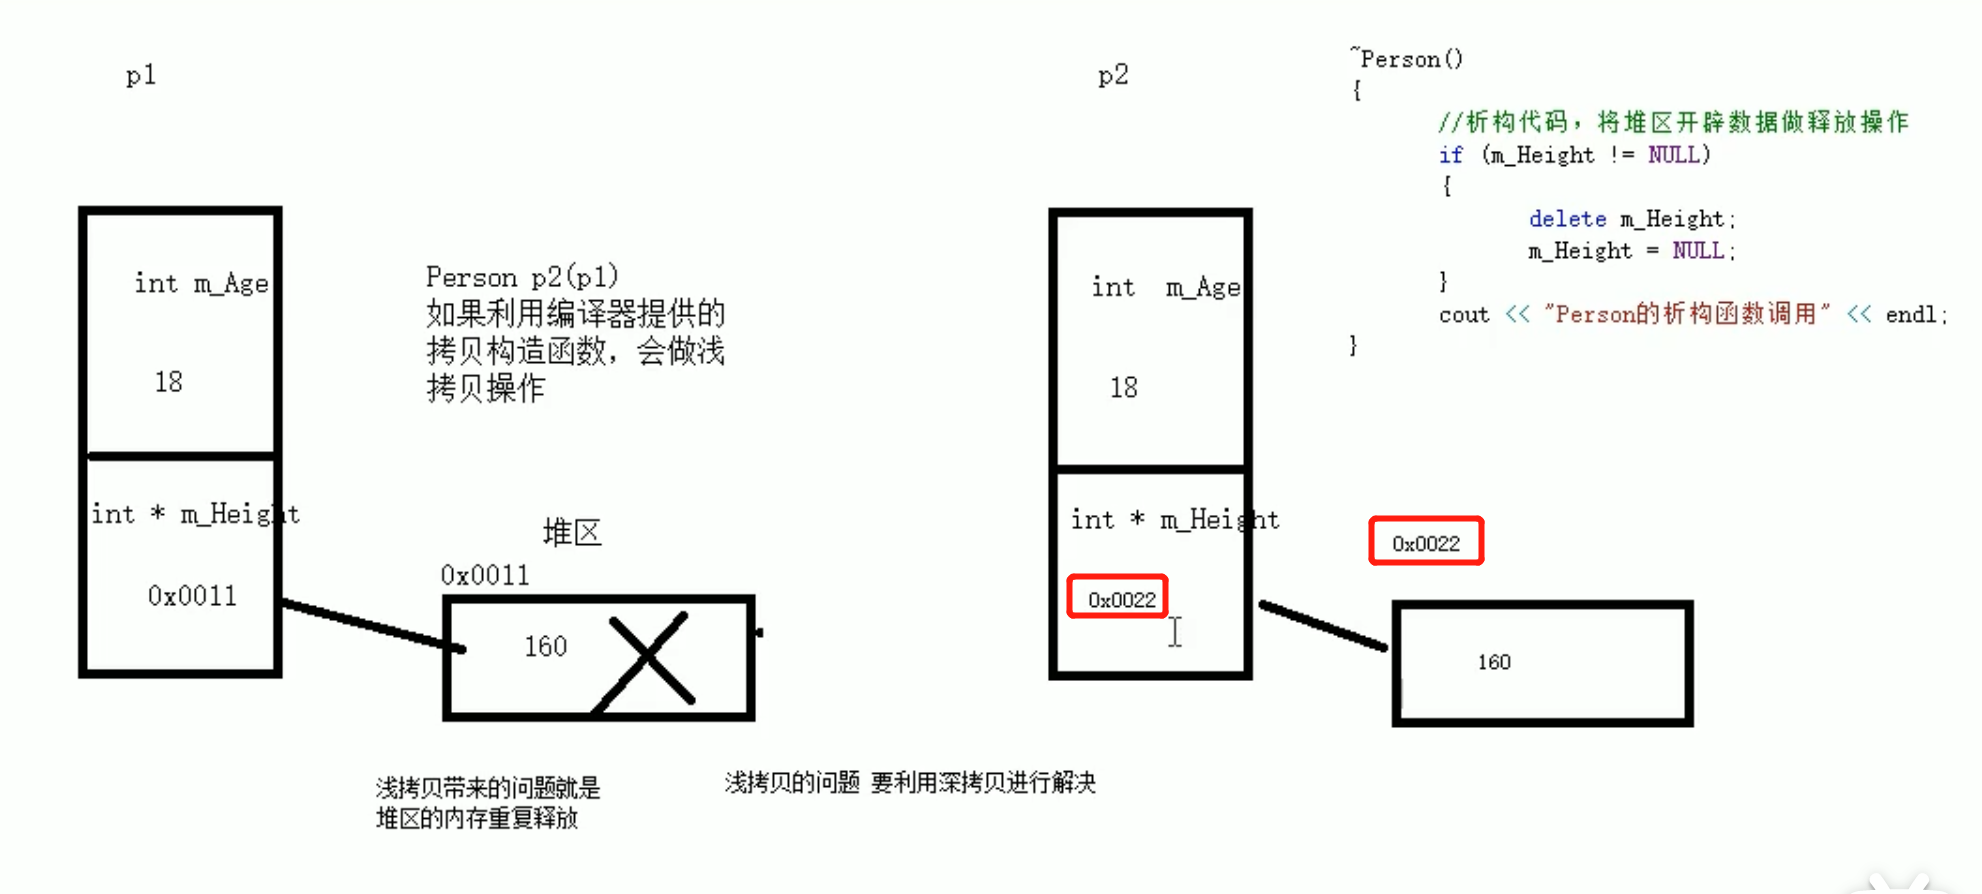

In [ ]:
#include <iostream>
using namespace std;

class Person
{
public:
    Person()
    {
        cout << "Person的默认构造函数调用" << endl;
    }
    Person(int age,int height)
    {
        m_Age = age;
        m_Height = new int(height);   //把数据创建在堆区，用指针接收new创建的地址
        cout << "Person的有参构造函数调用" << endl;
    }

    //自己实现拷贝函数 解决浅拷贝带来的问题
    Person(const Person& p)
    {
        cout << "Person 拷贝构造函数调用" << endl;
        m_Age = p.m_Age;
        //m_Height = p.m_Height; 编译器默认实现就是这行代码，默认执行的是浅拷贝
                                //浅拷贝带来的问题就是堆区的内存重复释放


        // 深拷贝操作，在堆区自己创建一份内存
        m_Height = new int(*p.m_Height);
    }
    
    ~Person()
    {
        //析构代码，将堆区开辟数据做释放操作
        cout << "Person的析构函数调用" << endl;
        if (m_Height != NULL)
        {
            delete m_Height;    //释放堆区数据

        }
    }
    int m_Age;
    int * m_Height;
};

void test01()
{
    Person p1(18,160);
    
    cout << "p1的年龄为：" << p1.m_Age << "身高为：" << * p1.m_Height << endl; //指针通过解引用获得数据

    Person p2(p1);

    cout << "p2的年龄为：" << p2.m_Age << "身高为：" << * p2.m_Height << endl;

}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - Person的有参构造函数调用  
 - p1的年龄为：18身高为：160  
 - Person 拷贝构造函数调用  
 - p2的年龄为：18身高为：160  
 - Person的析构函数调用  
 - Person的析构函数调用  
 - 请按任意键继续. . .

# 4. 初始化列表

① C++提供了初始化列表语法，用来初始化属性。

② 语法：构造函数(): 属性1(值1),属性2(值2),...,()

## 4.1 传统初始化操作

In [ ]:
#include <iostream>
using namespace std;

class Person
{
public:
    //传统初始化操作
    Person(int a, int b, int c)
    {
        m_A = a;
        m_B = b;
        m_C = c;
    }
    int m_A;
    int m_B;
    int m_C;
};

void test01()
{

    Person p(10, 20, 30);
    cout << "m_A:" << p.m_A << endl;
    cout << "m_B:" << p.m_B << endl;
    cout << "m_C:" << p.m_C << endl;


}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - m_A:10  
 - m_B:20  
 - m_C:30  
 - 请按任意键继续. . .

## 4.2 灵活初始化操作

In [ ]:
#include <iostream>
using namespace std;

class Person
{
public:

    /*
    构造函数型的初始化操作
    固定初始化10、30、40
    Person():m_A(10),m_B(30),m_C(40)
    {

    }
    int m_A;
    int m_B;
    int m_C;
    */

    //可以灵活的初始化
    Person(int a, int b, int c) :m_A(a), m_B(b), m_C(c)
    {

    }
    int m_A;
    int m_B;
    int m_C;
};

void test01()
{

    Person p(30, 20, 10);
    cout << "m_A:" << p.m_A << endl;
    cout << "m_B:" << p.m_B << endl;
    cout << "m_C:" << p.m_C << endl;


}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - m_A:30  
 - m_B:20  
 - m_C:10   
 - 请按任意键继续. . .

# 5. 类对象作为类成员

① C++类中的属性、方法称为成员。

② C++类中的成员可以是另一个类的对象，称该成员为对象成员。

③ B类中有对象A作为成员，A为对象成员，那么当创建B对象时，A与B的构造和析构的顺序是：

1. 当其他类对象作为本类成员，构造时候先构造其他类对象，在构造自身。
2. 当其他类对象作为本类成员，析构的顺序与构造相反，想析构自身，再析构其他类对象。

In [ ]:
#include <iostream>
using namespace std;

//手机类
class Phone
{
public:
    Phone(string pName)
    {
        cout << "Phone的构造函数调用" << endl;
        m_PName = pName;
    }

    ~Phone()
    {
        cout << "Phone的析构代码函数调用" << endl;
    }

    string m_PName;
};

//人类
class Person
{
public:
    //m_Phone(pName) 中m_Phone为phone对象，此语句类似于隐式转换法 Phone m_Phone = pName  
    Person(string name, string pName) :m_Name(name), m_Phone(pName) //掉用的是灵活初始化列表      
    {
        cout << "Person的构造函数调用" << endl;
    }

    ~Person()
    {
        cout << "Person的析构代码函数调用" << endl;
    }

    //姓名
    string m_Name;
    //手机
    Phone m_Phone;
};

//当其他类对象作为本类成员，构造时候先构造其他类对象，在构造自身。
//当其他类对象作为本类成员，析构的顺序与构造相反，想析构自身，再析构其他类对象
void test01()
{

    Person p("张三", "苹果MAX");
    cout << p.m_Name << "m_A:" << p.m_Phone.m_PName << endl;
}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - Phone的构造函数调用  
 - Person的构造函数调用  
 - 张三m_A:苹果MAX  
 - Person的析构代码函数调用  
 - Phone的析构代码函数调用  
 - 请按任意键继续. . .

# 6. 静态成员

① 静态成员就是在成员变量和成员函数前加上关键字static，称为静态成员。

② 静态成员分为：

1. 静态成员变量

  -- 所有对象共享同一份数据  
  -- 在编译阶段分配内存  
  -- 类内声明，类外初始化

2. 静态成员函数  

  -- 所有对象共享同一个函数  
  -- 静态成员函数只能访问静态成员变量

③ 调用静态成员函数有两种方法：

1. 通过对象调用
2. 通过类名调用

## 6.1 静态成员变量

In [ ]:
#include<iostream>
using namespace std;

//静态成员变量
class Person
{
public:
    //1、所有对象都共享同一份数据
    //2、编译阶段就分配内存
    //3、类内声明，类外初始化操作
    static int m_A;

//静态成员变量也是有访问权限的
private:
    static int m_B;
};

int Person::m_A = 100;

void test01()
{
    Person p;
    cout << p.m_A << endl;

    Person p2;
    p2.m_A = 200;

    //100 ? 200，共享同一份数据，所以p.m_A为200
    cout << p.m_A << endl;
}

void test02()
{
    //静态成员变量 不属于某个对象上，所有对象都共享同一份数据
    //因此静态成员变量有两种访问方式
    
    //1、通过对象进行访问
    Person p;
    cout << p.m_A << endl;

    //2、通过类名进行访问
    cout << Person::m_A << endl;

    //cout << Person::m_B << endl; //报错，私有作用域，出了类是不可以访问的
}

int main()
{
    test01();

    test02();

    system("pause");
}

运行结果：
 - 100
 - 200
 - 200
 - 200
 - 请按任意键继续. . .

## 6.2 静态成员函数

In [ ]:
#include <iostream>
using namespace std;

//静态成员函数
//所有对象共享同一个函数
//静态成员函数只能访问静态成员变量
class Person
{
public:
    //静态成员函数
    static void func()
    {
        m_A = 100; //静态成员函数可以访问静态成员变量，这个数据是共享的，只有一份，所以不需要区分哪个对象的。                                
        //m_B = 200; //静态成员函数不可以访问非静态成员变量，无法区分到底是哪个对象的m_B属性，非静态成员变量属于特定的对象上面
        cout << "static void func调用" << endl;
    }
    
    static int m_A; //静态成员变量
    int m_B; //非静态成员变量

    //静态成员函数也是有访问权限的
private:
    static void func2()
    {
        cout << "static void func2调用" << endl;
    }
};

int Person::m_A = 0;

//有两种访问方式
void test01()
{
    //1、通过对象访问
    Person p;
    p.func();

    //2、通过类名访问
    Person::func();   //静态成员函数，所有对象共享同一个函数，可以直接通过类名访问。

    //Person::func2(); //类外访问不到私有静态成员函数
}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - static void func调用  
 - static void func调用  
 - 请按任意键继续. . .

## 6.3 成员变量和成员函数分开存储

① 在C++中，类内对的成员变量和成员函数分开存储，只有非静态成员变量才属于类的对象上。

In [ ]:
#include <iostream>
using namespace std;

class Person01
{
public:
    
};

class Person02
{
public:
    int m_A; //非静态成员变量  属于类的对象上

    static int m_B;  //静态成员变量 不属于类对象上

    //void fun(){} //非静态成员函数 不属于类对象上

    static void func2() {} //静态成员函数 不属于类的对象上
};

int Person02::m_B = 0;

void test01()
{
    Person01 p;

    //空对象占用内存空间为：1
    //C++编译器会给每个空对象也分配一个字节空间，是为了区分空对象占内存的位置
    //每个空对象也应该有一个独一无二的内存空间
    cout << "size of p = " << sizeof(p) << endl;
}

void test02()
{
    Person02 p2;

    cout << "size of p2 = " << sizeof(p2) << endl;  //通过打印内存空间大小，检测静态成员变量、非静态成员函数等在不在对象内存上....      
}

int main()
{
    test01();
    test02();  

    system("pause");

    return 0;

}

运行结果：  
 - size of p = 1  
 - size of p2 = 4  
 - 请按任意键继续. . .

# 7. this指针概念

① 每一个非静态成员函数只会诞生一份函数实例，也就是说多个同类型的对象会公用一块代码。

② C++通过提供特殊的对象指针，this指针指向被调用的成员函数所属的对象。

③ this指针是隐含每一个非静态成员函数内的一种指针。

④ this指针不需要定义，直接使用即可。

⑤ this指针的用途：

1. 当形参和成员变量同名时，可用this指针来区分。
2. 在类的非静态成员函数中返回对象本身，可使用return * this。

In [ ]:
#include <iostream>
using namespace std;

class Person
{
public:
    Person(int age)
    {
        //this指针指向的是被调用的成员函数所属的对象
        this->age = age;  //当下面实例化对象p1在调用，this就指向p1
                          //用this指针的时候，可以该变量与形参命名相同，但是编译器会认为两个不同
                          //如果这里是 age = age；那么编译器会将这两个age和上面的形参age当做同一个age，因此age并没有赋值                    
    }
    
    //如果用值的方式返回，Person PersonAddAge(Person& p){}，它返回的是本体拷贝的对象p'，而不是本体p                                     
    Person& PersonAddAge(Person& p) //要返回本体的时候，要用引用的方式返回
    {
        this->age += p.age; //this->age为调用对象的age

        //this指向p2的指针，而*this指向的就是p2这个对象本体
        return *this;
    }
    int age; 
};

//1、解决名称冲突
void test01()
{
    Person p1(18);
    cout << "p1的年龄为：" << p1.age << endl;
}

//2、返回对象本身用*this
void test02()
{
    Person p1(10);

    Person p2(10);

    //链式编程思想
    p2.PersonAddAge(p1).PersonAddAge(p1).PersonAddAge(p1);

    cout << "p2的年龄为：" << p2.age << endl;
}


int main()
{
    test01();
    test02();

    system("pause");

    return 0;

}

运行结果：  
 - p1的年龄为：18  
 - p2的年龄为：40  
 - 请按任意键继续. . .

# 8. 空指针访问成员函数

① C++中空指针也是可以调用成员函数的，但是也要注意有没有用到this指针。

② 如果用到this指针，需要加以判断保证代码的健壮性。

In [ ]:
#include <iostream>
using namespace std;

class Person
{
public:
    void showClassName()
    {
        cout << "this is Person class" << endl;
    }

    /*
    void showPersonAge()
    {
        //报错原因是传入的指针是为NULL
        cout << "age= " << m_Age << endl; //默认m_Age是this->m_Age
    }
    */
    
    void showPersonAge()
    {
        if (this == NULL)
        {
            return; //为空的时候直接退出
        }
        cout << "age= " << this->m_Age << endl; 
    }

    int m_Age;
};

void test01()
{
    Person* p = NULL;

    p->showClassName();

    p->showPersonAge();
}


int main()
{
    test01();
    
    system("pause");

    return 0;

}

运行结果：  
 - this is Person class  
 - 请按任意键继续. . .

# 9. const修饰成员函数

① 常函数：

1. 成员函数后加const后我们称这个函数为常函数。
2. 常函数内不可以修改成员属性。
3. 成员属性声明时加关键字mutable后，在常函数中依然可以修改。

② 常对象：

1. 声明对象前加const称该对象为常对象。
2. 常对象只能调用常函数。

In [ ]:
#include <iostream>
using namespace std;

class Person
{
public:
    //this指针的本质 是指针常量 指针的指向是不可以修改的，即Person * const this                                                      
    //在成员函数后面加const，修饰的是this指向，让指针指向的值也不可以修改，即void showPerson() const 使得 const Person * const this        
    void showPerson() const  //当加了一个const
    {
        //m_A = 100; //相当于 this->m_A;，由于加了一个const，所以指针指向的值不可以更改                                                                  
        //this = NULL; //this指针不可以修改指针的指向的
        this->m_B = 100; //加了mutable就可以修改this指向的值了
    }

    void func()
    {
        m_A = 100;
    }

    int m_A;
    mutable int m_B; //特殊变量，即使在常函数中，也可以修改这个值，加上关键字mutable
};

void test01()
{
    Person p;
    p.showPerson();

}

//常对象
void test02()
{
    const Person p; //在对象前加const，变为常对象
    //p.m_A = 100;  //常对象不可以修改普通变量
    p.m_B = 100; //m_B是特殊值，在常对象下也可以修改

    //常对象只能调用常函数
    p.showPerson();
    //p.func(); //常对象 不可以调用普通成员函数，因为普通成员函数可以修改属性
}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - 请按任意键继续. . .